In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)

In [14]:
from afrc import AnalyticalFRC


In [3]:
e2e = {}
rg = {}
lengths = [51,101,151,251,351]
mean_rg = []
mean_e2e = []

for l in lengths:
    e2e[l] = np.loadtxt(f'../1D/data/frc_a_{l}_e2e.csv')
    rg[l] = np.loadtxt(f'../1D/data/frc_a_{l}_rg.csv')
    mean_rg.append(np.mean(rg[l]))
    mean_e2e.append(np.mean(e2e[l]))

### Rg histo

meta NOT subset; don't know how to subset; dropped


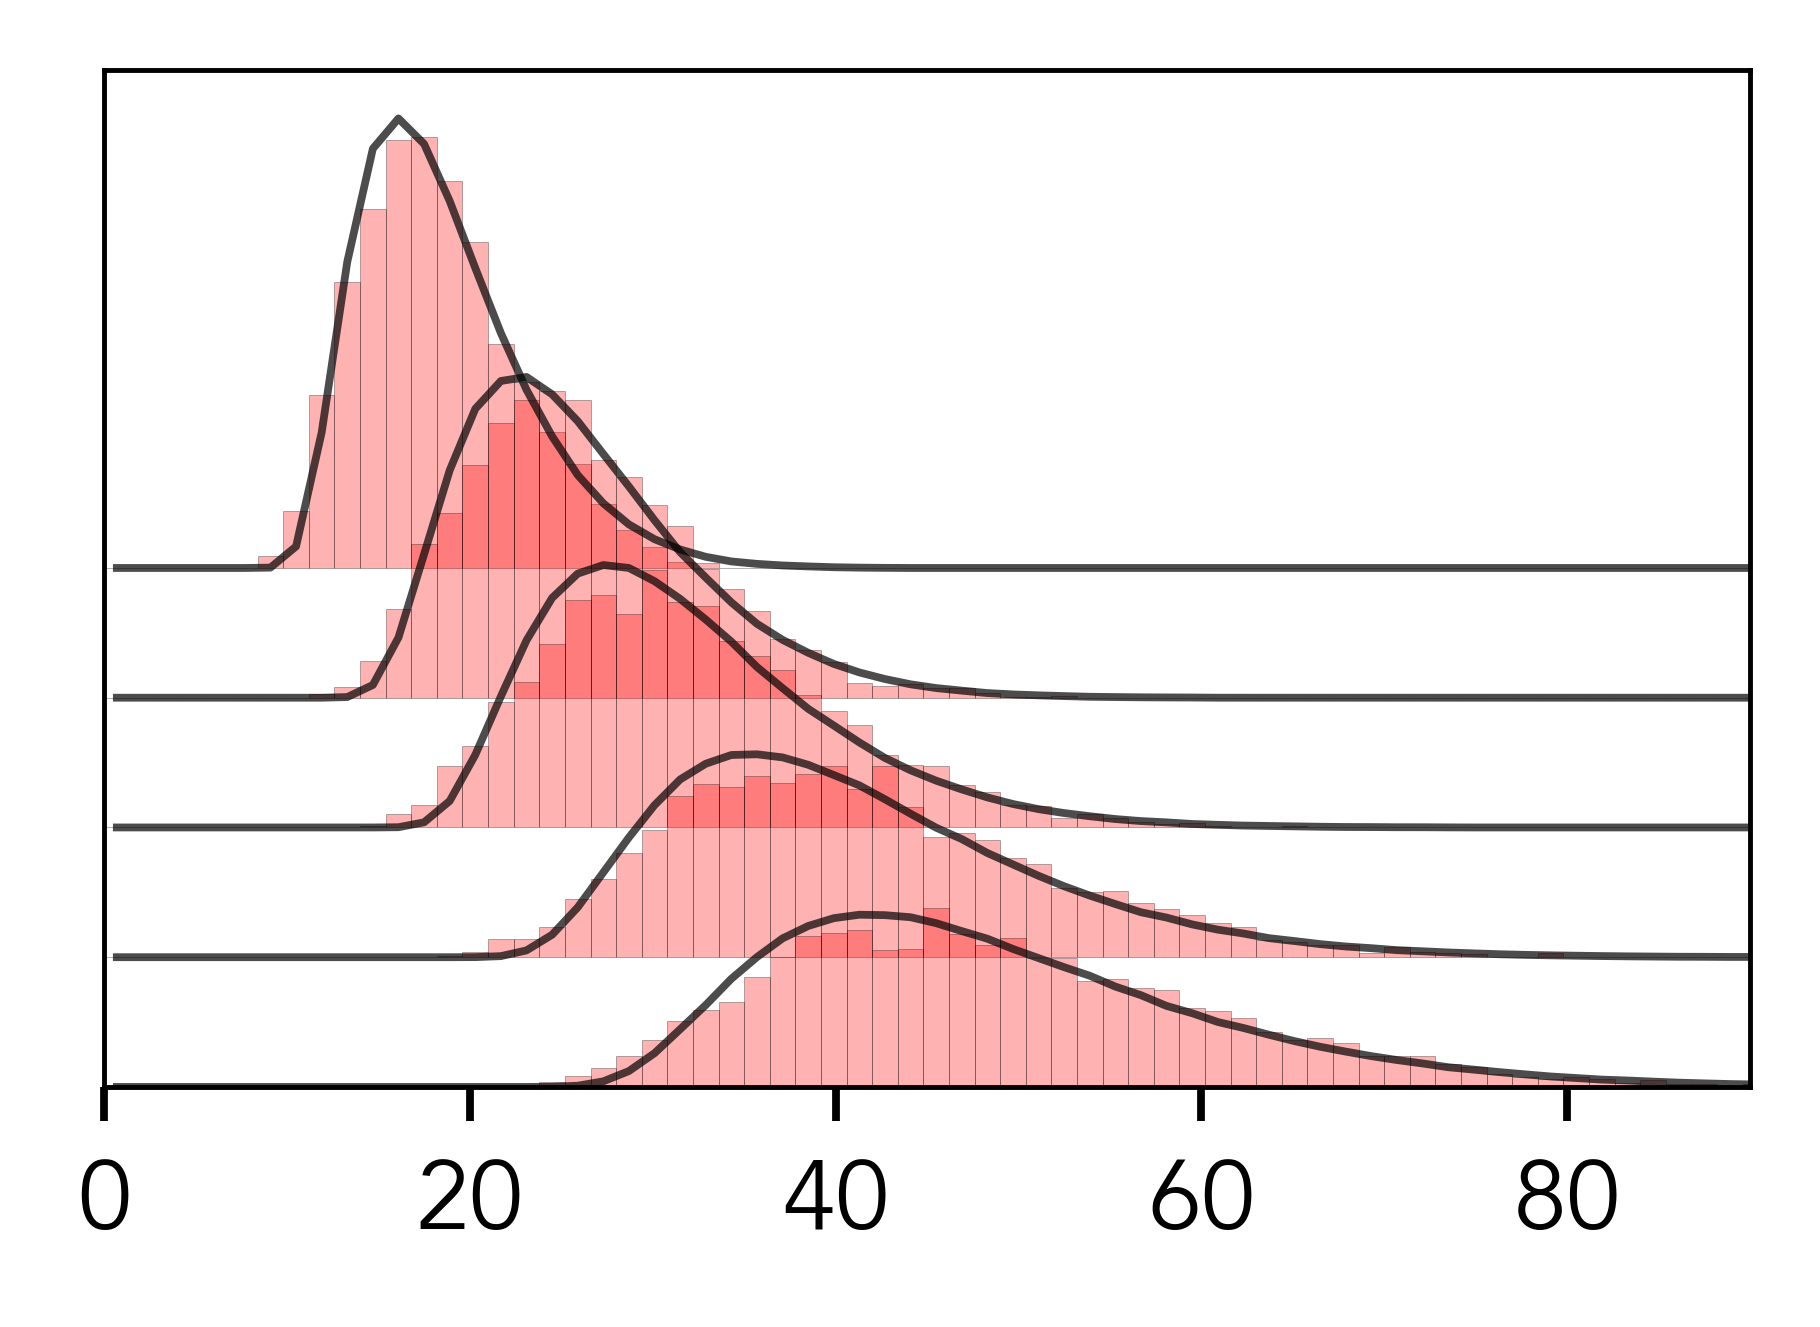

In [11]:
bin_width=1.4
max_val=120
bins = np.arange(0,max_val, bin_width)

count=1000000


figure(None, (2.7,2), dpi=350)
bottom = 0
bottom_step=200
for l in lengths:
    [counts_sim, b] = np.histogram(rg[l],bins)
    plot_bins = (b+bin_width*0.5)[:-1]
    
    # afrc
    correction = len(rg[l])/count
    synthetic_rg = AnalyticalFRC('A'*l).sample_rg_distribution(count)
    
    #
    [counts_afrc, b] = np.histogram(synthetic_rg,bins)
    
    plt.bar(plot_bins, counts_sim, bottom=bottom, width=bin_width, color='red', alpha=0.3,edgecolor='k', linewidth=0.1)
    #plt.plot(plot_bins, counts_sim,  color='black', alpha=0.4)
    plt.plot(plot_bins, (counts_afrc*correction)+bottom,  color='k', alpha=0.7,linewidth=0.8)
    
    bottom = bottom - bottom_step
    
    

plt.xlim([0,90])
plt.yticks([])

plt.tight_layout()
plt.savefig('panel_1f.pdf')


meta NOT subset; don't know how to subset; dropped


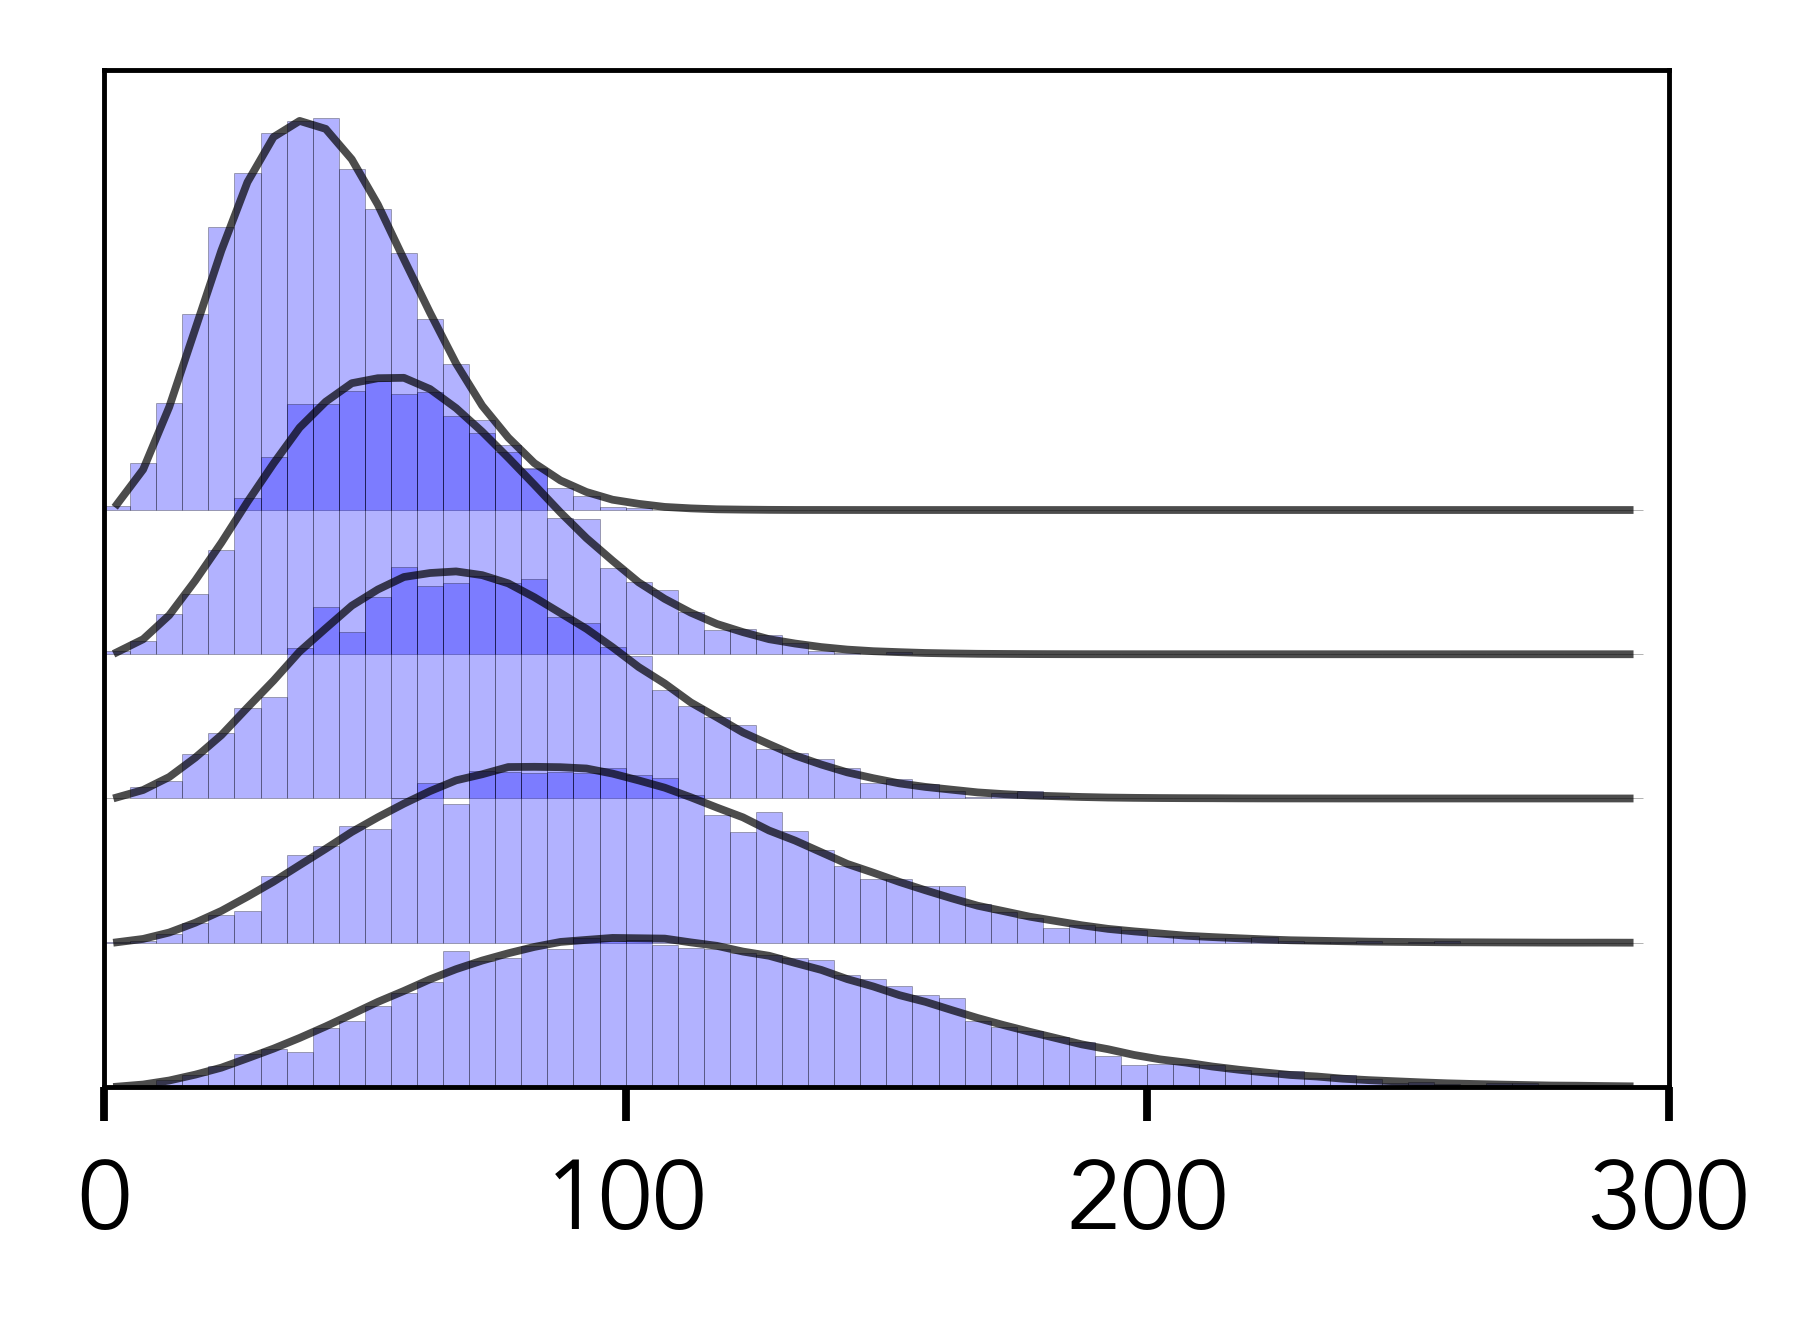

In [12]:
bin_width=5
max_val=300
bins = np.arange(0,max_val, bin_width)

count=1000000


figure(None, (2.7,2), dpi=350)
bottom = 0
bottom_step=200
for l in lengths:
    [counts_sim, b] = np.histogram(e2e[l],bins)
    plot_bins = (b+bin_width*0.5)[:-1]
    
    # afrc
    correction = len(rg[l])/count
    synthetic_re = AnalyticalFRC('A'*l).sample_re_distribution(count)
    
    #
    [counts_afrc, b] = np.histogram(synthetic_re,bins)
    
    plt.bar(plot_bins, counts_sim, bottom=bottom, width=bin_width, color='blue', alpha=0.3,edgecolor='k', linewidth=0.1)
    #plt.plot(plot_bins, counts_sim,  color='black', alpha=0.4)
    plt.plot(plot_bins, (counts_afrc*correction)+bottom,  color='k', alpha=0.7,linewidth=0.8)
    
    bottom = bottom - bottom_step
    
    

plt.xlim([0,max_val])
plt.yticks([])

plt.tight_layout()
plt.savefig('panel_1g.pdf')



In [13]:
lengths

[51, 101, 151, 251, 351]